#**Fine Tuning using InceptionResNetV2**
###Gayanthika Shankar
###School of Computing and Data Science
###gayanthika.s-26@scds.saiuniversity.edu.in

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.17.1


##Load the preprocessed dataset and model from drive

In [3]:
# load numpy array from npy file
from numpy import load

X_train_std = load('/content/gdrive/MyDrive/DL/X_train_std_model3.npy')
X_test_std = load('/content/gdrive/MyDrive/DL/X_test_std_model3.npy')

y_train = load('/content/gdrive/MyDrive/DL/y_train_model3.npy')
y_test = load('/content/gdrive/MyDrive/DL/y_test_model3.npy')

In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (1245, 299, 299, 3)
X_test_std_shape: (416, 299, 299, 3)


In [6]:
base_model3 = keras.applications.InceptionResNetV2(
    include_top=False,
    input_shape=(299,299,3),
    weights='imagenet'
)
base_model3.trainable = False

x = keras.layers.GlobalAveragePooling2D()(base_model3.output)
x = keras.layers.Dropout(0.15)(x)
output_ = keras.layers.Dense(3, activation='softmax')(x)
model3 = keras.models.Model(inputs=[base_model3.input], outputs=[output_])

#Compile the model
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Load the saved weights
model3.load_weights('/content/gdrive/MyDrive/DL/InceptionResNetV2_Best_Model_TL.h5')

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [7]:
model3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 54,341,347 (207.30 MB)

 Trainable params: 4,611 (18.01 KB)

 Non-trainable params: 54,336,736 (207.28 MB)

##Fine tuning:
- Set all layers as trainable

In [8]:
for layer in model3.layers:
    layer.trainable = True

##Compile and train the model

In [9]:

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

model3.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])


#Use the same data augmentation setup we used for transfer learning
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

#Create generators
train_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=16,
    subset='training'
)

validation_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=16,
    subset='validation'
)

callbacks3_FT = [
    keras.callbacks.ModelCheckpoint(
        "best_incepresnet_FT.weights.h5",
        monitor='val_accuracy',
        save_weights_only=True,
        save_best_only=True
    ),
]

#Train
history3_FT = model3.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks3_FT
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.9224 - loss: 0.2694 - val_accuracy: 0.4274 - val_loss: 369.2116
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 45s 599ms/step - accuracy: 0.9877 - loss: 0.0396 - val_accuracy: 0.5403 - val_loss: 20.9292
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 44s 588ms/step - accuracy: 0.9845 - loss: 0.0489 - val_accuracy: 0.7419 - val_loss: 0.6485
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 556ms/step - accuracy: 0.9855 - loss: 0.0596 - val_accuracy: 0.4274 - val_loss: 7.0124
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 44s 587ms/step - accuracy: 0.9777 - loss: 0.0768 - val_accuracy: 0.8629 - val_loss: 0.3671
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 558ms/step - accuracy: 0.9908 - loss: 0.0386 - val_accuracy: 0.8548 - val_loss: 0.4011
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 550ms/step - accuracy: 0.9752 - loss: 0.0743 - val_accuracy: 0.7661 - val_loss: 0.4998
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 555ms/step - accuracy: 0.9901 - loss: 0.0540 - val_accuracy: 0.83

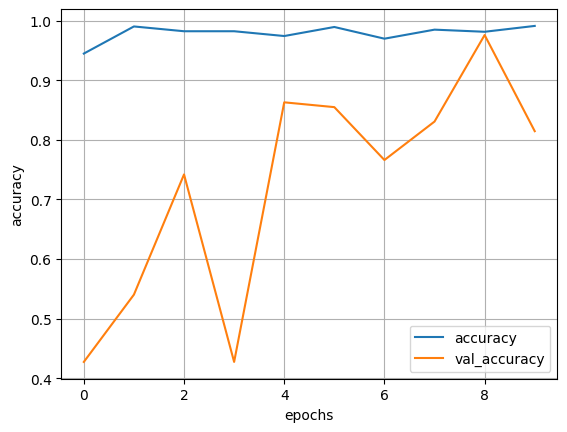

In [10]:
import pandas as pd
#Visualize accuracy
progress = {k:v for k,v in history3_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

##Evaluate Fine tuned model

In [11]:
testLoss3_FT, testAccuracy3_FT = model3.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss3_FT, testAccuracy3_FT))

13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - accuracy: 0.6831 - loss: 2.0716
Test-loss: 1.755759, Test-accuracy: 0.697115


##Update model using best weights

In [12]:
model3.load_weights("best_incepresnet_FT.weights.h5")

testLoss3_FT, testAccuracy3_FT = model3.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss3_FT, testAccuracy3_FT))

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step - accuracy: 0.9904 - loss: 0.0153
Test-loss: 0.022620, Test-accuracy: 0.987981


##Model performance

In [13]:
y_prob = model3.predict(X_test_std)
y_predict = np.argmax(y_prob, axis=-1)
print(y_predict)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step
[1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 2 1 0 1 0 0 0 0 1 1 1 0 0 2 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 2 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 2 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 2 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 2 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 2 1 1 1 1 0
 0 2 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 2 1 2 0 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 1 0 0 1 0 1 2 0 2 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 2 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 1 0 2 1 0 1 0 0]


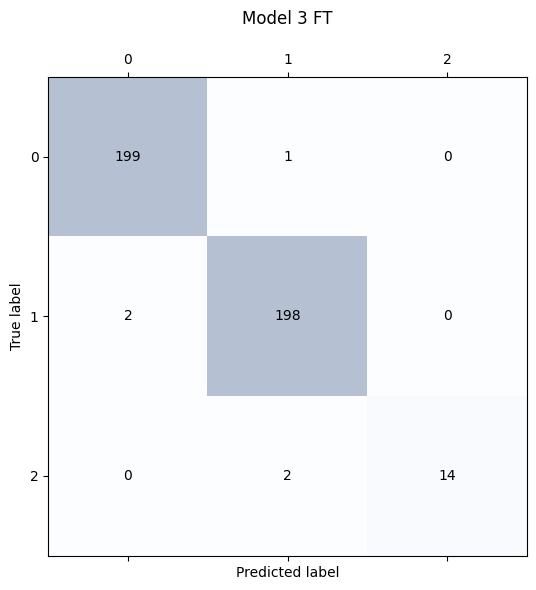

In [14]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model 3 FT\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_InceptionResNetV2.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [15]:
#classification scores

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  0.9880405663987755
Recall:  0.9879807692307693
F1-score:  0.987844491335763


##Save best model

In [16]:
model3.save('/content/gdrive/MyDrive/DL/InceptionResNetV2_Best_Model_FT.h5')